In [3]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Set style for visualizations
sns.set(style="whitegrid")

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.

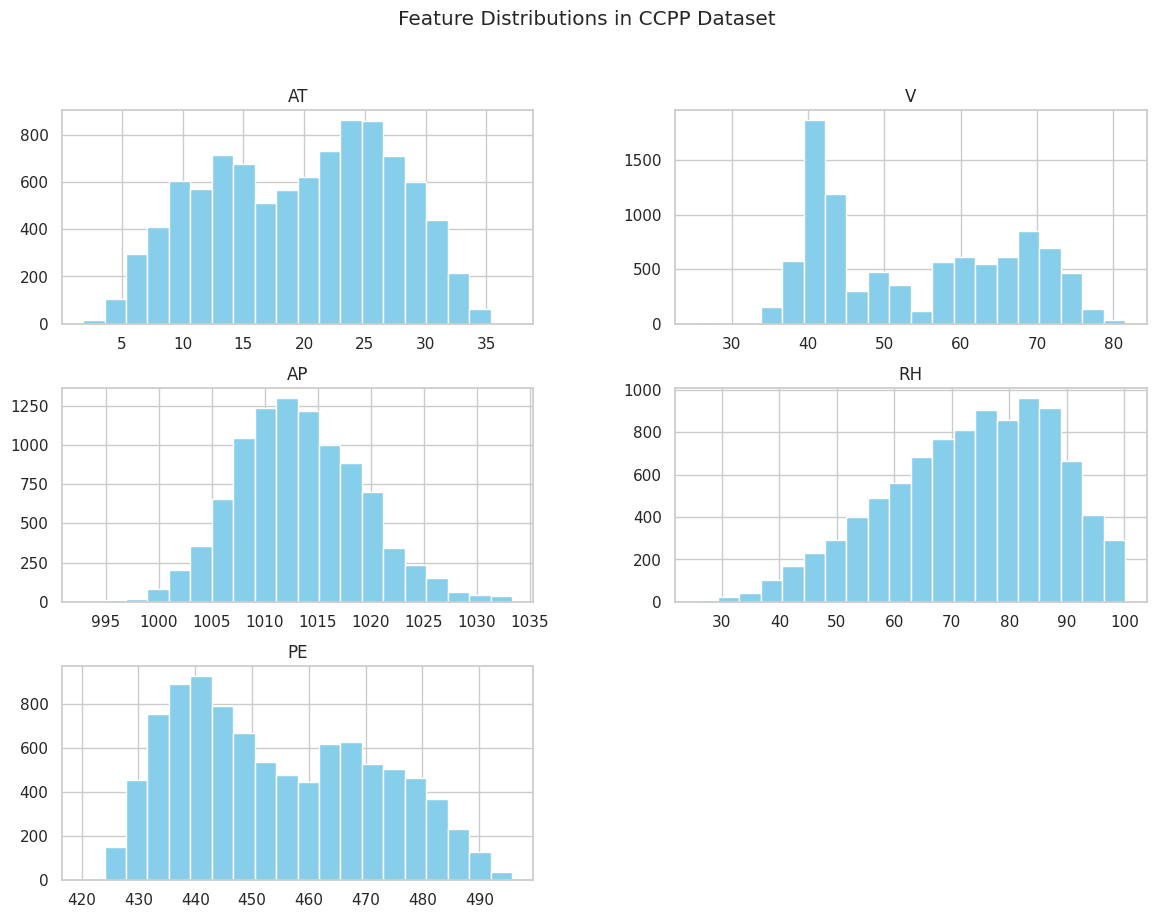

In [10]:
# Load the dataset
df = pd.read_csv('Folds5x2_pp.csv')  # Replace with actual file path

# Display first few rows
print(df.head())
print(df.info())
print(df.describe())

# Visualize data distribution of each feature
df.hist(bins=20, figsize=(14, 10), color='skyblue')
plt.suptitle("Feature Distributions in CCPP Dataset")
plt.show()

Missing values:
 AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


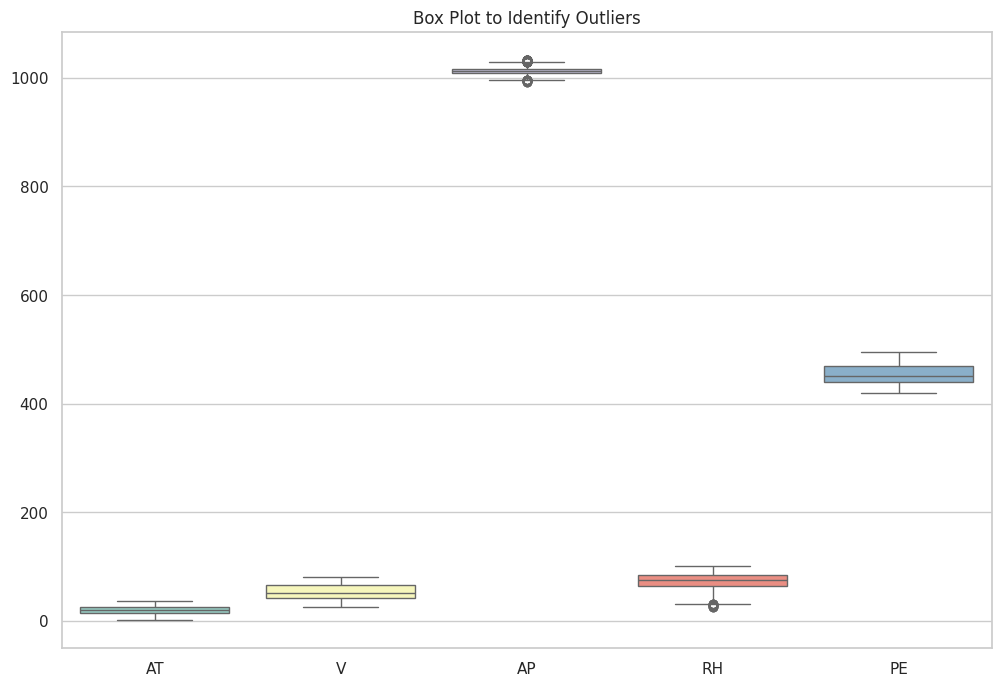

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette="Set3")
plt.title("Box Plot to Identify Outliers")
plt.show()


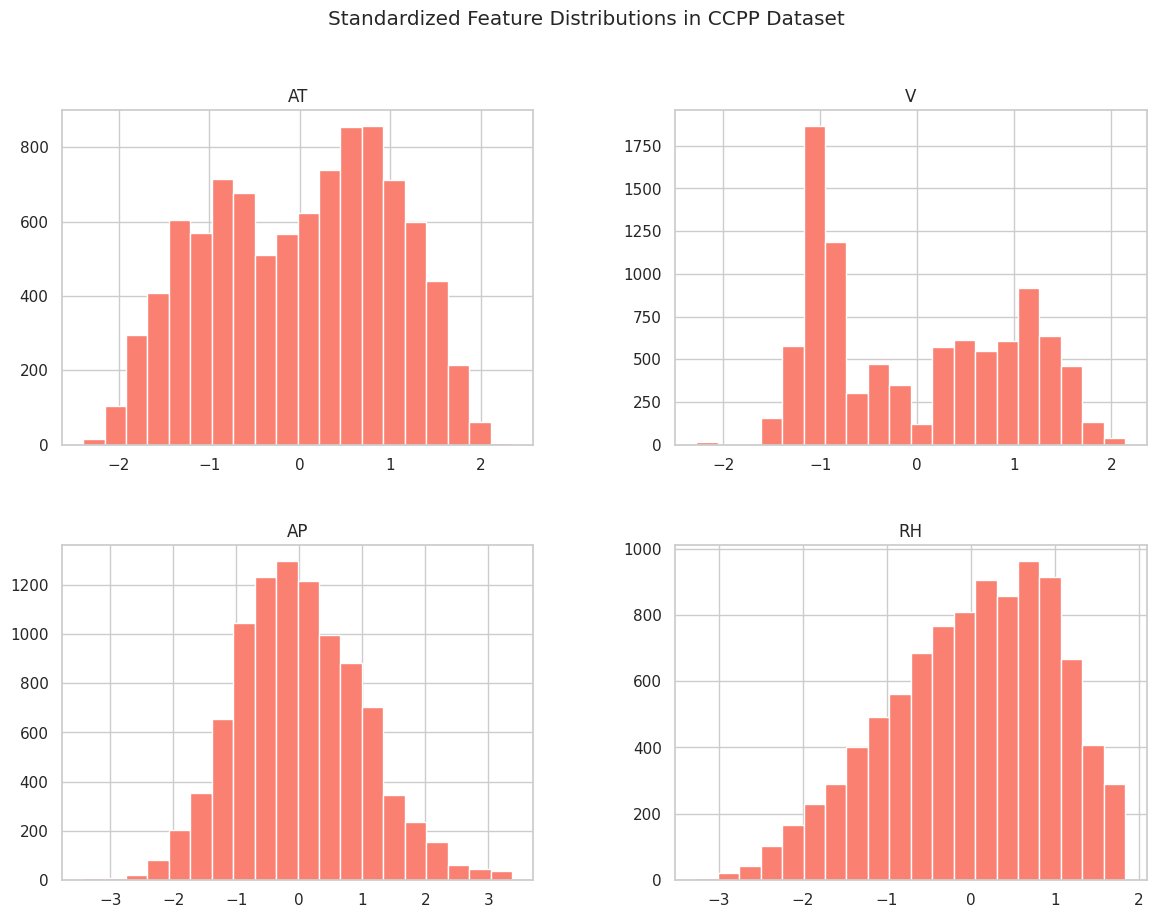

In [14]:
# Define features and target variable
X = df.drop("PE", axis=1)  # Drop the target column 'PE'
y = df["PE"]  # Target variable is 'PE'

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the scaled data distribution
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Use X.columns to match original feature names
scaled_df.hist(bins=20, figsize=(14, 10), color='salmon')
plt.suptitle("Standardized Feature Distributions in CCPP Dataset")
plt.show()


Linear Regression MSE: 20.27370599968743


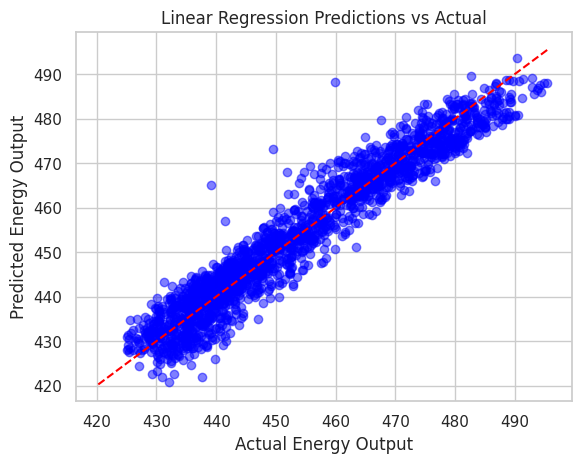

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate model
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin}")

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred_lin, color="blue", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("Linear Regression Predictions vs Actual")
plt.show()


SVR MSE: 16.775714264077834


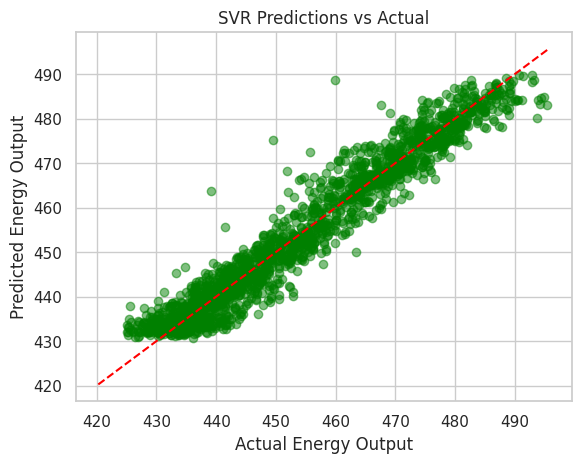

In [16]:
# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}")

# Visualization
plt.scatter(y_test, y_pred_svr, color="green", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("SVR Predictions vs Actual")
plt.show()

Decision Tree MSE: 19.617028477341627


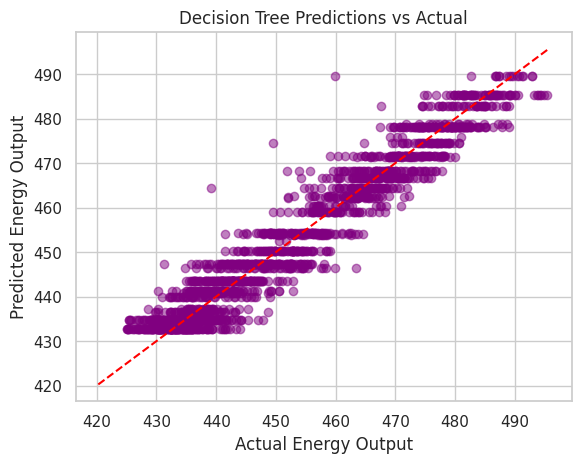

In [17]:
# Train Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")

# Visualization
plt.scatter(y_test, y_pred_dt, color="purple", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("Decision Tree Predictions vs Actual")
plt.show()


MLP Regressor MSE: 18.19960585291294


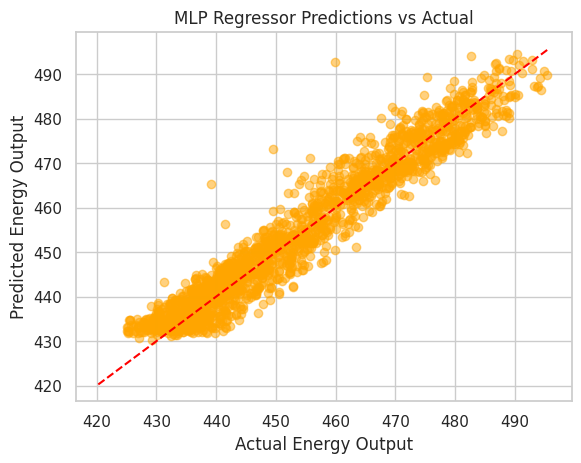

In [18]:
# Train MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluate model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Regressor MSE: {mse_mlp}")

# Visualization
plt.scatter(y_test, y_pred_mlp, color="orange", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("MLP Regressor Predictions vs Actual")
plt.show()

In [19]:
# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for each model
models = {'Linear Regression': lin_reg, 'SVR': svr, 'Decision Tree': dt, 'MLP Regressor': mlp}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{name} Mean CV MSE: {-np.mean(scores)}")


Linear Regression Mean CV MSE: 20.79936907191884
SVR Mean CV MSE: 17.39667477055678
Decision Tree Mean CV MSE: 19.789682178581415
MLP Regressor Mean CV MSE: 17.74148828828215


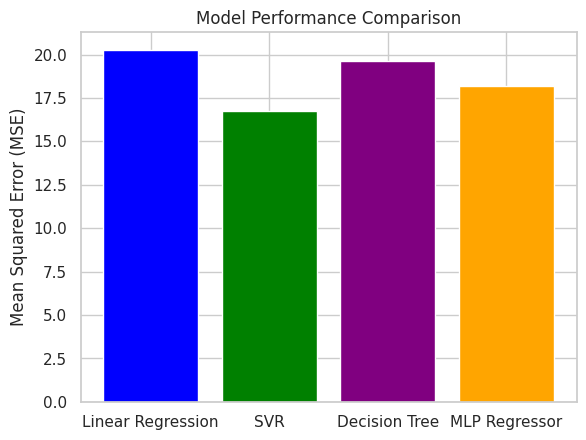

In [20]:
# Bar plot for MSE comparison across models
mse_values = [mse_lin, mse_svr, mse_dt, mse_mlp]
model_names = ["Linear Regression", "SVR", "Decision Tree", "MLP Regressor"]

plt.bar(model_names, mse_values, color=['blue', 'green', 'purple', 'orange'])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Performance Comparison")
plt.show()